# PSO

In [58]:
import numpy as np
# === Config Parameters (from PSO) ===

pso_best_pos = [ 6.50000000e+01,  7.10000000e+01,  5.40000000e+01,  1.00000000e-10,
 -4.55486260e+01, -2.69761667e+01, -5.44823753e+01, -2.60940676e+01,
 -5.12077242e+01,  6.64248561e+01]

window_sma = int(round(pso_best_pos[0]))
window_ema = int(round(pso_best_pos[1]))
window_lma = int(round(pso_best_pos[2]))
ema_alpha = pso_best_pos[3]
threshold = pso_best_pos[4]
w1 = pso_best_pos[5]
w2 = pso_best_pos[6]
w3 = pso_best_pos[7]
w4 = pso_best_pos[8]
w5 = pso_best_pos[9]

# PSO : Test

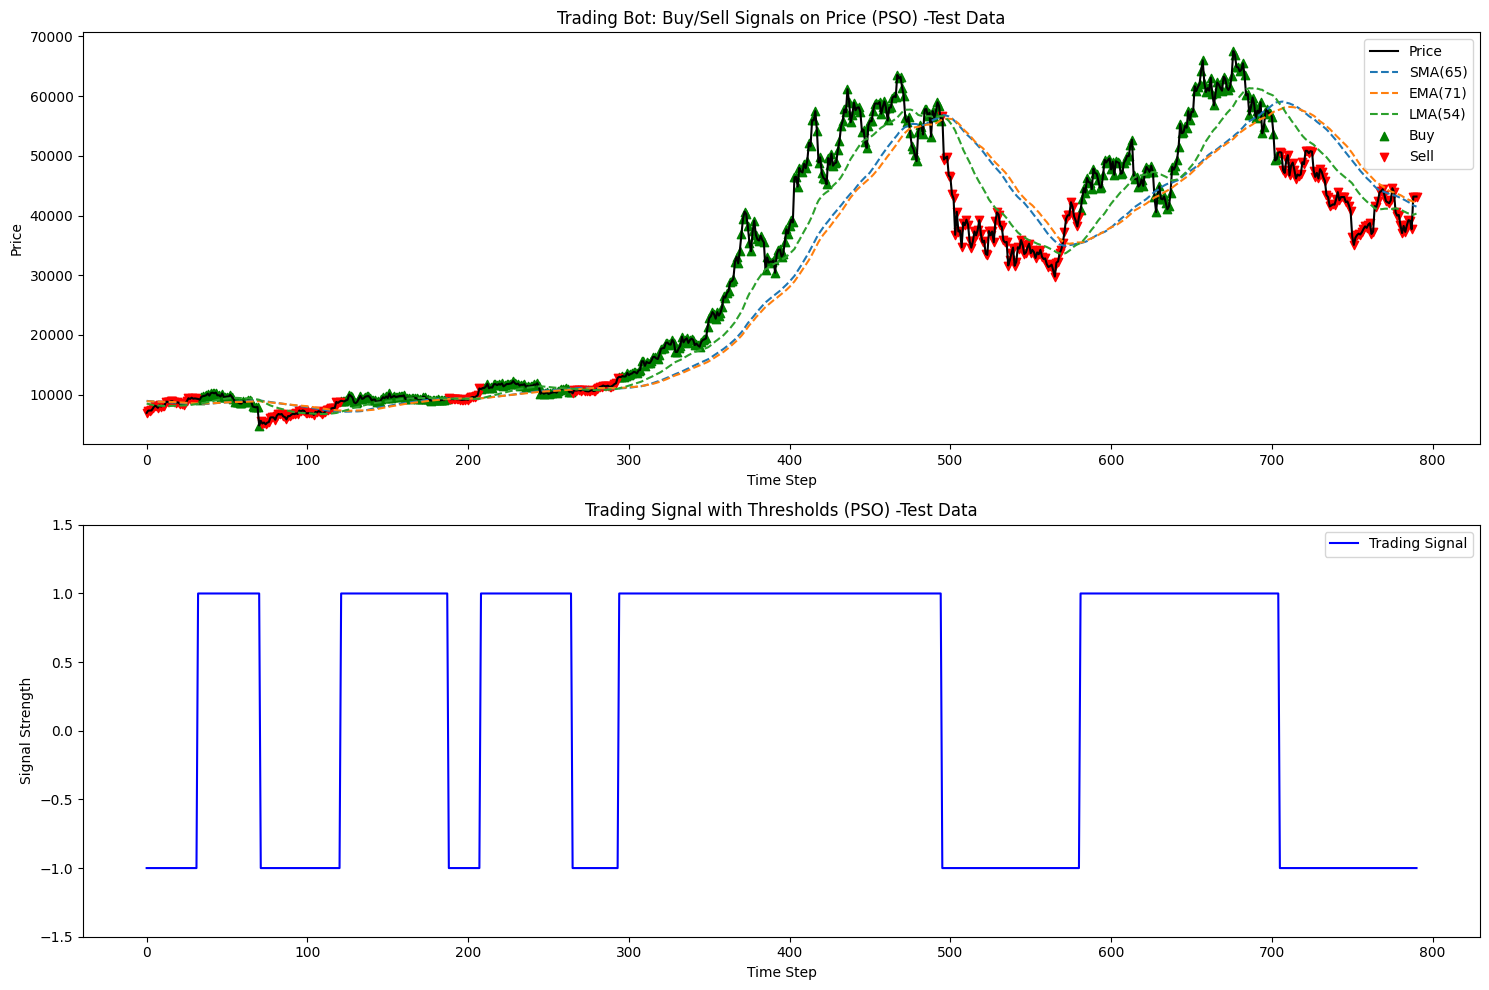

In [59]:
import matplotlib.pyplot as plt
import numpy as np

filepath = './testDaily.csv'
from data_processors import TradingDataProcessor
from data_processors import DataLoader
from trading_bot import TradingBotInstance  # Adjust import path as needed


def collect_momentum(loader):
    momentum = []
    while True:
        step_data = loader.step()
        if step_data is None:
            break
        # Extract only momentum values
        sma_mom, ema_mom, lma_mom = step_data[-3:]
        momentum.append((sma_mom, ema_mom, lma_mom))
    return np.array(momentum)



# === Prepare Data ===
processor = TradingDataProcessor(filepath)
prices = processor.closing_prices
sma = processor.get_sma(window_sma)
ema = processor.get_ema(window_ema, alpha=ema_alpha)
lma = processor.get_lma(window_lma)

# === Prepare DataLoader and get Momentum ===
loader_for_momentum = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
momentum = collect_momentum(loader_for_momentum)
sma_mom = momentum[:, 0]
ema_mom = momentum[:, 1]
lma_mom = momentum[:, 2]

# === Run Bot for Buy/Sell decisions and signal ===
loader_for_bot = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
bot = TradingBotInstance(
    dataset_path=filepath,
    window_sma=window_sma,
    window_ema=window_ema,
    window_lma=window_lma,
    ema_alpha=ema_alpha,
    threshold=threshold,
    w1=w1, w2=w2, w3=w3, w4=w4, w5=w5
)

# Re-implement signal tracking
signals = []
prices_trimmed = []
buy_signals = []
sell_signals = []
bot.current_signal = -1

while True:
    step_data = loader_for_bot.step()
    if step_data is None:
        break
    sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
    signal = bot._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
    signals.append(signal)
    price = loader_for_bot.get_price()
    prices_trimmed.append(price)

    if signal == 1:
        buy_signals.append(price)
        sell_signals.append(np.nan)
    elif signal == -1:
        sell_signals.append(price)
        buy_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

# === Plotting ===
plt.figure(figsize=(15, 10))

# --- Price & Moving Averages ---
plt.subplot(2, 1, 1)
plt.plot(prices_trimmed, label="Price", color='black')
plt.plot(sma, label=f"SMA({window_sma})", linestyle='--')
plt.plot(ema, label=f"EMA({window_ema})", linestyle='--')
plt.plot(lma, label=f"LMA({window_lma})", linestyle='--')
plt.scatter(range(len(buy_signals)), buy_signals, label='Buy', color='green', marker='^')
plt.scatter(range(len(sell_signals)), sell_signals, label='Sell', color='red', marker='v')
plt.title("Trading Bot: Buy/Sell Signals on Price (PSO) -Test Data")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()

# --- Signal with Thresholds ---
plt.subplot(2, 1, 2)
signal_array = np.array(signals)
plt.plot(signal_array, label="Trading Signal", color='blue')
plt.ylim(-1.5, 1.5)
plt.title("Trading Signal with Thresholds (PSO) -Test Data")
plt.xlabel("Time Step")
plt.ylabel("Signal Strength")
plt.legend()

plt.tight_layout()
plt.show()


# PSO : Training

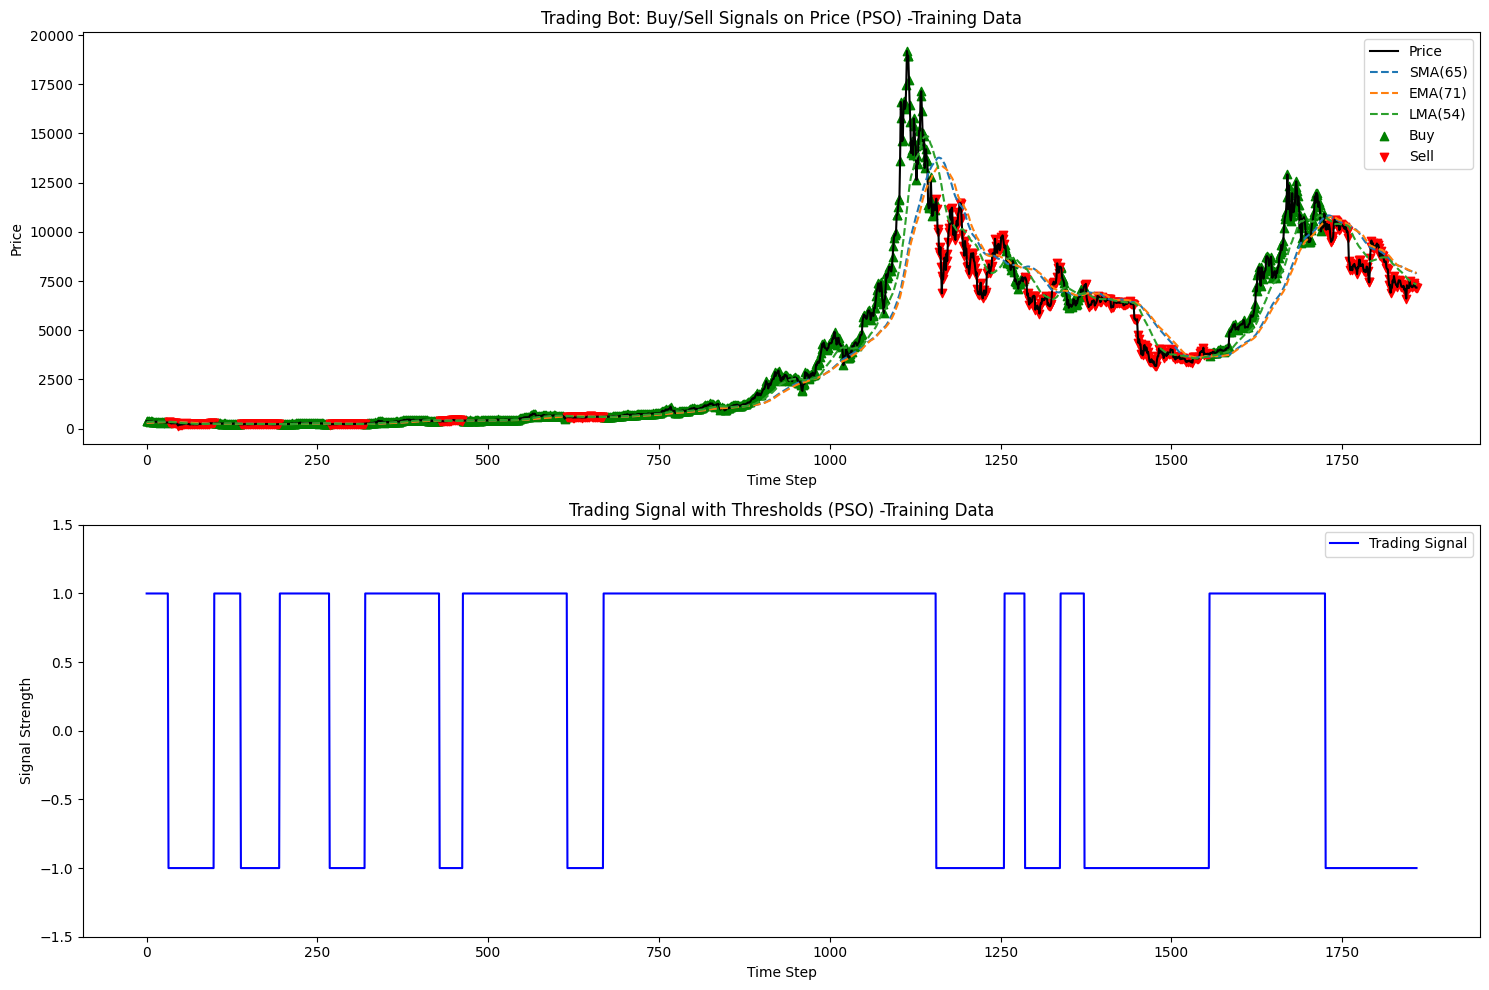

In [60]:
filepath = './trainingDaily.csv'
import matplotlib.pyplot as plt
import numpy as np

from data_processors import TradingDataProcessor
from data_processors import DataLoader
from trading_bot import TradingBotInstance  # Adjust import path as needed


def collect_momentum(loader):
    momentum = []
    while True:
        step_data = loader.step()
        if step_data is None:
            break
        # Extract only momentum values
        sma_mom, ema_mom, lma_mom = step_data[-3:]
        momentum.append((sma_mom, ema_mom, lma_mom))
    return np.array(momentum)



# === Prepare Data ===
processor = TradingDataProcessor(filepath)
prices = processor.closing_prices
sma = processor.get_sma(window_sma)
ema = processor.get_ema(window_ema, alpha=ema_alpha)
lma = processor.get_lma(window_lma)

# === Prepare DataLoader and get Momentum ===
loader_for_momentum = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
momentum = collect_momentum(loader_for_momentum)
sma_mom = momentum[:, 0]
ema_mom = momentum[:, 1]
lma_mom = momentum[:, 2]

# === Run Bot for Buy/Sell decisions and signal ===
loader_for_bot = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
bot = TradingBotInstance(
    dataset_path=filepath,
    window_sma=window_sma,
    window_ema=window_ema,
    window_lma=window_lma,
    ema_alpha=ema_alpha,
    threshold=threshold,
    w1=w1, w2=w2, w3=w3, w4=w4, w5=w5
)

# Re-implement signal tracking
signals = []
prices_trimmed = []
buy_signals = []
sell_signals = []
bot.current_signal = -1

while True:
    step_data = loader_for_bot.step()
    if step_data is None:
        break
    sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
    signal = bot._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
    signals.append(signal)
    price = loader_for_bot.get_price()
    prices_trimmed.append(price)

    if signal == 1:
        buy_signals.append(price)
        sell_signals.append(np.nan)
    elif signal == -1:
        sell_signals.append(price)
        buy_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

# === Plotting ===
plt.figure(figsize=(15, 10))

# --- Price & Moving Averages ---
plt.subplot(2, 1, 1)
plt.plot(prices_trimmed, label="Price", color='black')
plt.plot(sma, label=f"SMA({window_sma})", linestyle='--')
plt.plot(ema, label=f"EMA({window_ema})", linestyle='--')
plt.plot(lma, label=f"LMA({window_lma})", linestyle='--')
plt.scatter(range(len(buy_signals)), buy_signals, label='Buy', color='green', marker='^')
plt.scatter(range(len(sell_signals)), sell_signals, label='Sell', color='red', marker='v')
plt.title("Trading Bot: Buy/Sell Signals on Price (PSO) -Training Data")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()

# --- Signal with Thresholds ---
plt.subplot(2, 1, 2)
signal_array = np.array(signals)
plt.plot(signal_array, label="Trading Signal", color='blue')
plt.ylim(-1.5, 1.5)
plt.title("Trading Signal with Thresholds (PSO) -Training Data")
plt.xlabel("Time Step")
plt.ylabel("Signal Strength")
plt.legend()

plt.tight_layout()
plt.show()


# PSO-SA

In [62]:
# === Config Parameters (from ABC) ===
best_psosa_params = [ 7.00000000e+01,  1.00000000e+02,  4.90000000e+01,  6.25333466e-02,
 -9.03678234e+01, -9.04913661e+01, -1.00000000e+02, -5.69421064e+00,
 -8.26760003e+01,  2.99818104e+02]


window_sma = int(round(best_psosa_params[0]))
window_ema = int(round(best_psosa_params[1]))
window_lma = int(round(best_psosa_params[2]))
ema_alpha = best_psosa_params[3]
threshold = best_psosa_params[4]
w1 = best_psosa_params[5]
w2 = best_psosa_params[6]
w3 = best_psosa_params[7]
w4 = best_psosa_params[8]
w5 = best_psosa_params[9]


# PSO-SA : Training Data 

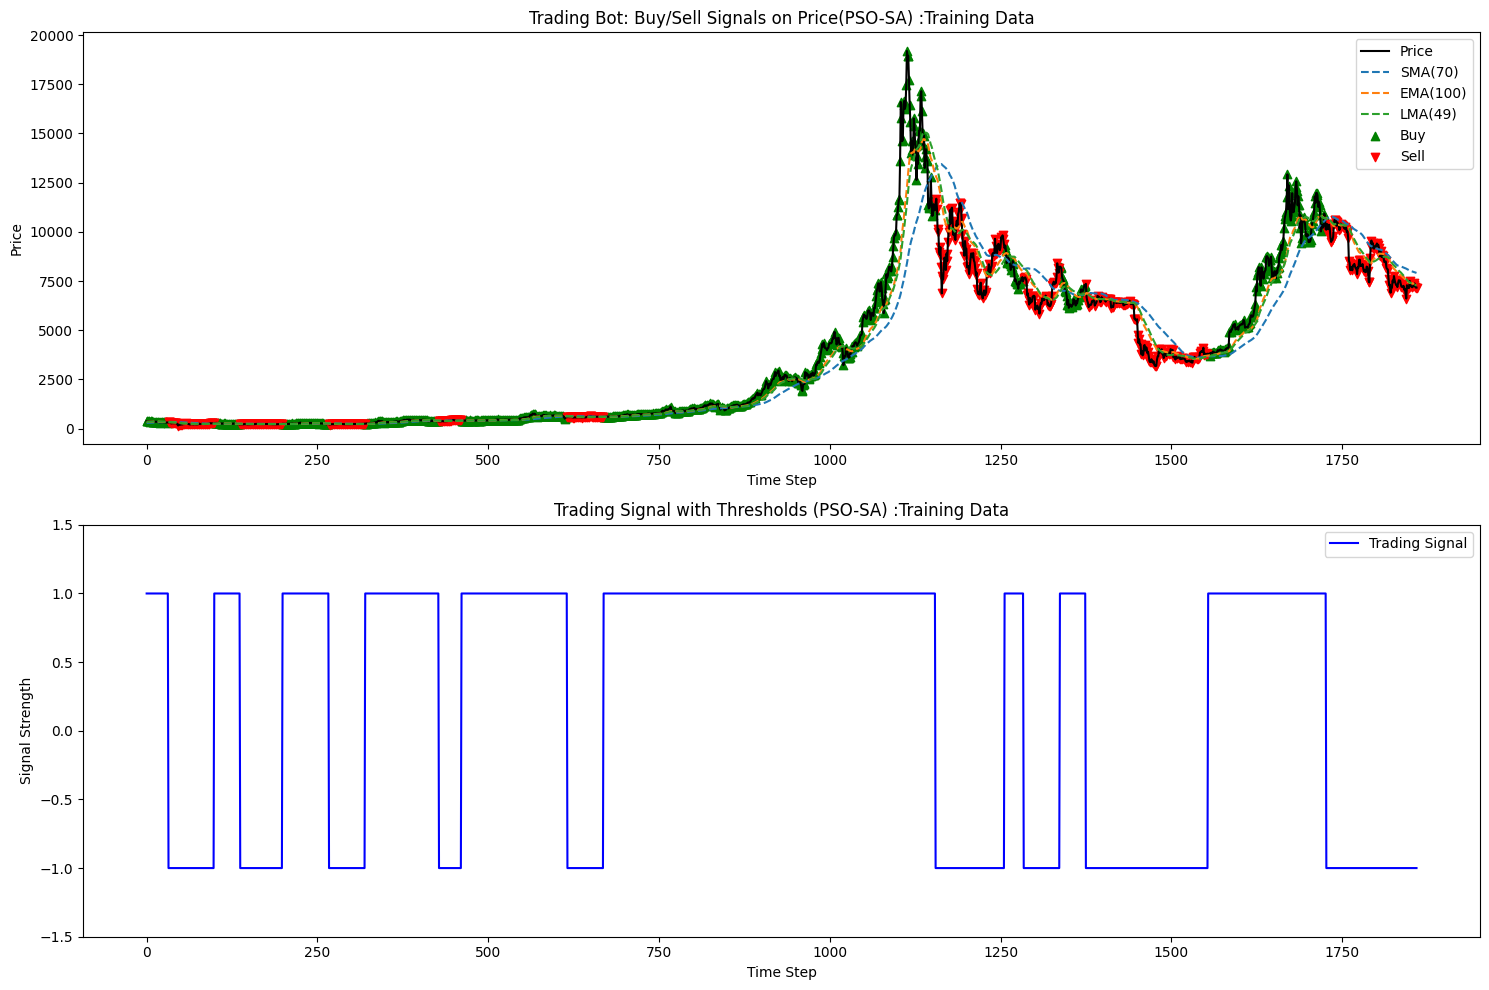

In [63]:
filepath = './trainingDaily.csv'

import matplotlib.pyplot as plt
import numpy as np

from data_processors import TradingDataProcessor
from data_processors import DataLoader
from trading_bot import TradingBotInstance  # Adjust import path as needed


def collect_momentum(loader):
    momentum = []
    while True:
        step_data = loader.step()
        if step_data is None:
            break
        # Extract only momentum values
        sma_mom, ema_mom, lma_mom = step_data[-3:]
        momentum.append((sma_mom, ema_mom, lma_mom))
    return np.array(momentum)



# === Prepare Data ===
processor = TradingDataProcessor(filepath)
prices = processor.closing_prices
sma = processor.get_sma(window_sma)
ema = processor.get_ema(window_ema, alpha=ema_alpha)
lma = processor.get_lma(window_lma)

# === Prepare DataLoader and get Momentum ===
loader_for_momentum = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
momentum = collect_momentum(loader_for_momentum)
sma_mom = momentum[:, 0]
ema_mom = momentum[:, 1]
lma_mom = momentum[:, 2]

# === Run Bot for Buy/Sell decisions and signal ===
loader_for_bot = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
bot = TradingBotInstance(
    dataset_path=filepath,
    window_sma=window_sma,
    window_ema=window_ema,
    window_lma=window_lma,
    ema_alpha=ema_alpha,
    threshold=threshold,
    w1=w1, w2=w2, w3=w3, w4=w4, w5=w5
)

# Re-implement signal tracking
signals = []
prices_trimmed = []
buy_signals = []
sell_signals = []
bot.current_signal = -1

while True:
    step_data = loader_for_bot.step()
    if step_data is None:
        break
    sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
    signal = bot._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
    signals.append(signal)
    price = loader_for_bot.get_price()
    prices_trimmed.append(price)

    if signal == 1:
        buy_signals.append(price)
        sell_signals.append(np.nan)
    elif signal == -1:
        sell_signals.append(price)
        buy_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

# === Plotting ===
plt.figure(figsize=(15, 10))

# --- Price & Moving Averages ---
plt.subplot(2, 1, 1)
plt.plot(prices_trimmed, label="Price", color='black')
plt.plot(sma, label=f"SMA({window_sma})", linestyle='--')
plt.plot(ema, label=f"EMA({window_ema})", linestyle='--')
plt.plot(lma, label=f"LMA({window_lma})", linestyle='--')
plt.scatter(range(len(buy_signals)), buy_signals, label='Buy', color='green', marker='^')
plt.scatter(range(len(sell_signals)), sell_signals, label='Sell', color='red', marker='v')
plt.title("Trading Bot: Buy/Sell Signals on Price(PSO-SA) :Training Data")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()

# --- Signal with Thresholds ---
plt.subplot(2, 1, 2)
signal_array = np.array(signals)
plt.plot(signal_array, label="Trading Signal", color='blue')
plt.ylim(-1.5, 1.5)
plt.title("Trading Signal with Thresholds (PSO-SA) :Training Data")
plt.xlabel("Time Step")
plt.ylabel("Signal Strength")
plt.legend()

plt.tight_layout()
plt.show()


# PSO-SA : Test Data 

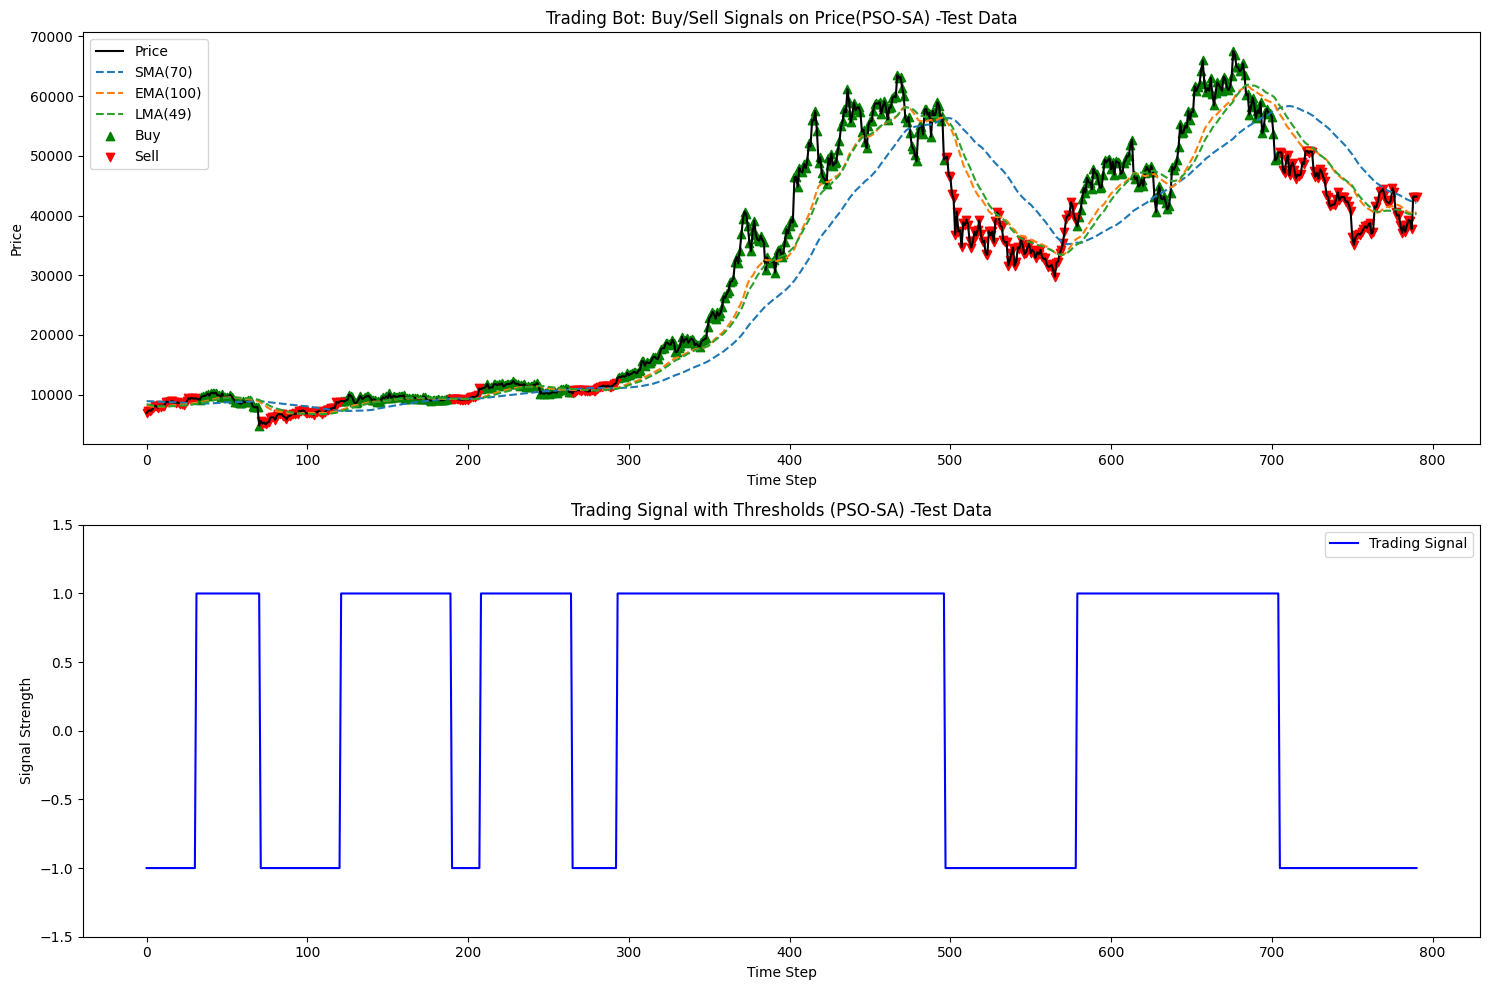

In [64]:
filepath = './testDaily.csv'

import matplotlib.pyplot as plt
import numpy as np

from data_processors import TradingDataProcessor
from data_processors import DataLoader
from trading_bot import TradingBotInstance  # Adjust import path as needed


def collect_momentum(loader):
    momentum = []
    while True:
        step_data = loader.step()
        if step_data is None:
            break
        # Extract only momentum values
        sma_mom, ema_mom, lma_mom = step_data[-3:]
        momentum.append((sma_mom, ema_mom, lma_mom))
    return np.array(momentum)



# === Prepare Data ===
processor = TradingDataProcessor(filepath)
prices = processor.closing_prices
sma = processor.get_sma(window_sma)
ema = processor.get_ema(window_ema, alpha=ema_alpha)
lma = processor.get_lma(window_lma)

# === Prepare DataLoader and get Momentum ===
loader_for_momentum = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
momentum = collect_momentum(loader_for_momentum)
sma_mom = momentum[:, 0]
ema_mom = momentum[:, 1]
lma_mom = momentum[:, 2]

# === Run Bot for Buy/Sell decisions and signal ===
loader_for_bot = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
bot = TradingBotInstance(
    dataset_path=filepath,
    window_sma=window_sma,
    window_ema=window_ema,
    window_lma=window_lma,
    ema_alpha=ema_alpha,
    threshold=threshold,
    w1=w1, w2=w2, w3=w3, w4=w4, w5=w5
)

# Re-implement signal tracking
signals = []
prices_trimmed = []
buy_signals = []
sell_signals = []
bot.current_signal = -1

while True:
    step_data = loader_for_bot.step()
    if step_data is None:
        break
    sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
    signal = bot._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
    signals.append(signal)
    price = loader_for_bot.get_price()
    prices_trimmed.append(price)

    if signal == 1:
        buy_signals.append(price)
        sell_signals.append(np.nan)
    elif signal == -1:
        sell_signals.append(price)
        buy_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

# === Plotting ===
plt.figure(figsize=(15, 10))

# --- Price & Moving Averages ---
plt.subplot(2, 1, 1)
plt.plot(prices_trimmed, label="Price", color='black')
plt.plot(sma, label=f"SMA({window_sma})", linestyle='--')
plt.plot(ema, label=f"EMA({window_ema})", linestyle='--')
plt.plot(lma, label=f"LMA({window_lma})", linestyle='--')
plt.scatter(range(len(buy_signals)), buy_signals, label='Buy', color='green', marker='^')
plt.scatter(range(len(sell_signals)), sell_signals, label='Sell', color='red', marker='v')
plt.title("Trading Bot: Buy/Sell Signals on Price(PSO-SA) -Test Data")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()

# --- Signal with Thresholds ---
plt.subplot(2, 1, 2)
signal_array = np.array(signals)
plt.plot(signal_array, label="Trading Signal", color='blue')
plt.ylim(-1.5, 1.5)
plt.title("Trading Signal with Thresholds (PSO-SA) -Test Data")
plt.xlabel("Time Step")
plt.ylabel("Signal Strength")
plt.legend()

plt.tight_layout()
plt.show()


# Artificial Bee Colony -  test

In [52]:
# === Config Parameters (from ABC) ===
abc_best_pos = [ 70.,          63.,          56.,           0.91669508,   7.42379891,
 -51.96699202, -59.86903673, -56.09916981,  -4.44954893, 437.25279956]



window_sma = int(round(abc_best_pos[0]))
window_ema = int(round(abc_best_pos[1]))
window_lma = int(round(abc_best_pos[2]))
ema_alpha = abc_best_pos[3]
threshold = abc_best_pos[4]
w1 = abc_best_pos[5]
w2 = abc_best_pos[6]
w3 = abc_best_pos[7]
w4 = abc_best_pos[8]
w5 = abc_best_pos[9]


# Artificial Bee Colony : Training

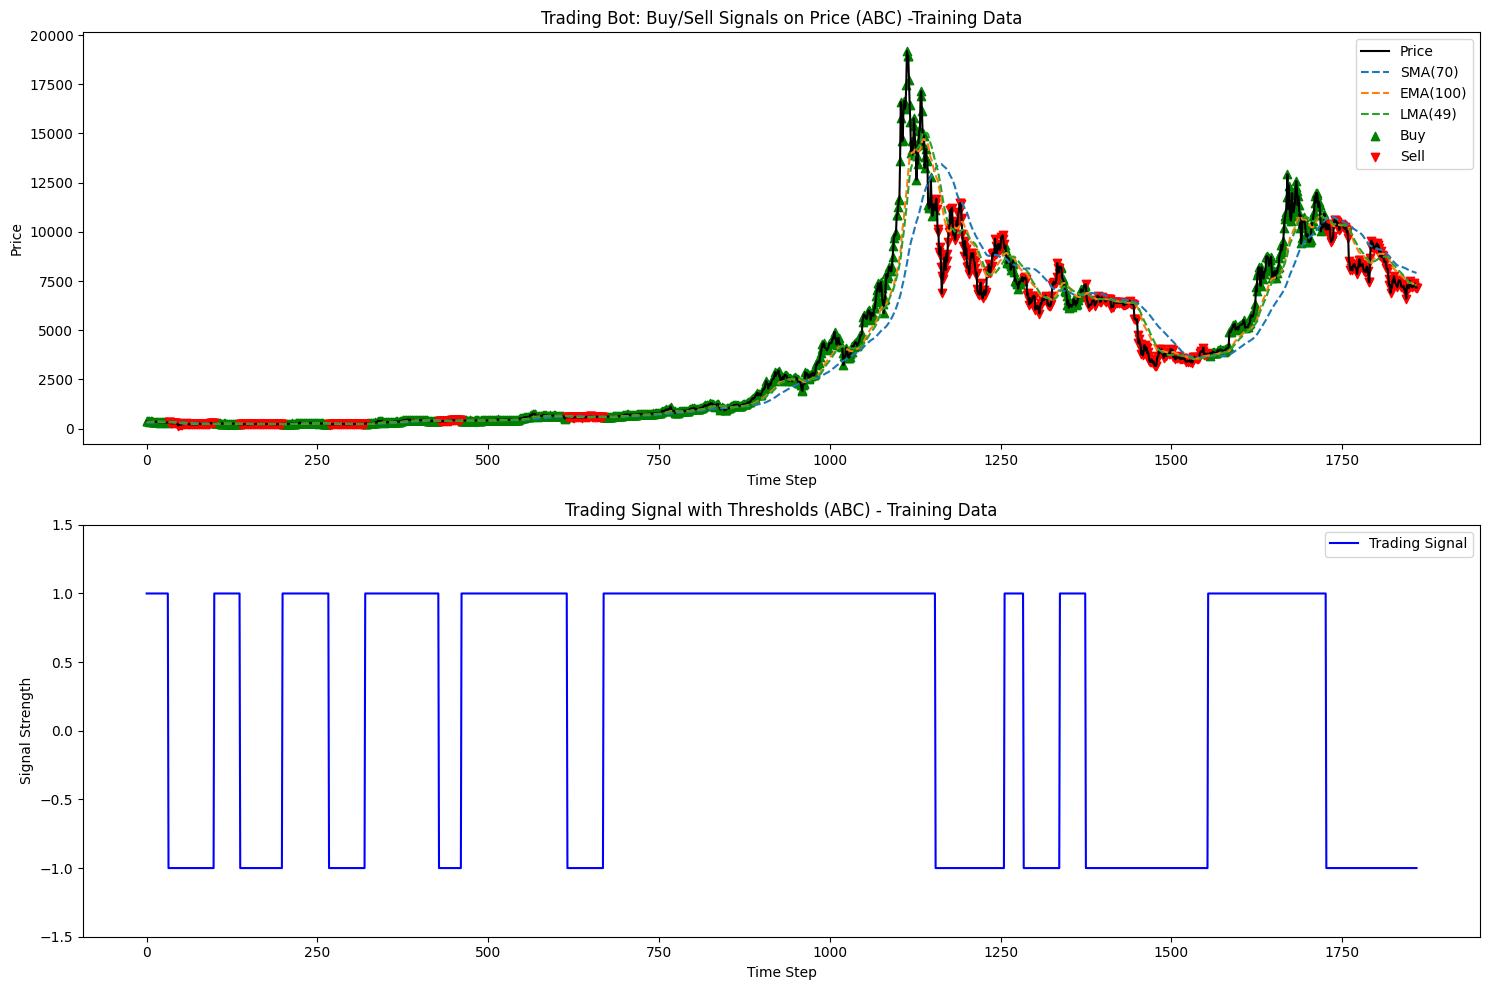

In [65]:

filepath = './trainingDaily.csv'

import matplotlib.pyplot as plt
import numpy as np

from data_processors import TradingDataProcessor
from data_processors import DataLoader
from trading_bot import TradingBotInstance  # Adjust import path as needed


def collect_momentum(loader):
    momentum = []
    while True:
        step_data = loader.step()
        if step_data is None:
            break
        # Extract only momentum values
        sma_mom, ema_mom, lma_mom = step_data[-3:]
        momentum.append((sma_mom, ema_mom, lma_mom))
    return np.array(momentum)



# === Prepare Data ===
processor = TradingDataProcessor(filepath)
prices = processor.closing_prices
sma = processor.get_sma(window_sma)
ema = processor.get_ema(window_ema, alpha=ema_alpha)
lma = processor.get_lma(window_lma)

# === Prepare DataLoader and get Momentum ===
loader_for_momentum = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
momentum = collect_momentum(loader_for_momentum)
sma_mom = momentum[:, 0]
ema_mom = momentum[:, 1]
lma_mom = momentum[:, 2]

# === Run Bot for Buy/Sell decisions and signal ===
loader_for_bot = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
bot = TradingBotInstance(
    dataset_path=filepath,
    window_sma=window_sma,
    window_ema=window_ema,
    window_lma=window_lma,
    ema_alpha=ema_alpha,
    threshold=threshold,
    w1=w1, w2=w2, w3=w3, w4=w4, w5=w5
)

# Re-implement signal tracking
signals = []
prices_trimmed = []
buy_signals = []
sell_signals = []
bot.current_signal = -1

while True:
    step_data = loader_for_bot.step()
    if step_data is None:
        break
    sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
    signal = bot._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
    signals.append(signal)
    price = loader_for_bot.get_price()
    prices_trimmed.append(price)

    if signal == 1:
        buy_signals.append(price)
        sell_signals.append(np.nan)
    elif signal == -1:
        sell_signals.append(price)
        buy_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

# === Plotting ===
plt.figure(figsize=(15, 10))

# --- Price & Moving Averages ---
plt.subplot(2, 1, 1)
plt.plot(prices_trimmed, label="Price", color='black')
plt.plot(sma, label=f"SMA({window_sma})", linestyle='--')
plt.plot(ema, label=f"EMA({window_ema})", linestyle='--')
plt.plot(lma, label=f"LMA({window_lma})", linestyle='--')
plt.scatter(range(len(buy_signals)), buy_signals, label='Buy', color='green', marker='^')
plt.scatter(range(len(sell_signals)), sell_signals, label='Sell', color='red', marker='v')
plt.title("Trading Bot: Buy/Sell Signals on Price (ABC) -Training Data")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()


# --- Signal with Thresholds ---
plt.subplot(2, 1, 2)
signal_array = np.array(signals)
plt.plot(signal_array, label="Trading Signal", color='blue')
plt.ylim(-1.5, 1.5)
plt.title("Trading Signal with Thresholds (ABC) - Training Data")
plt.xlabel("Time Step")
plt.ylabel("Signal Strength")
plt.legend()

plt.tight_layout()
plt.show()


# Artificial Bee Colony : Test

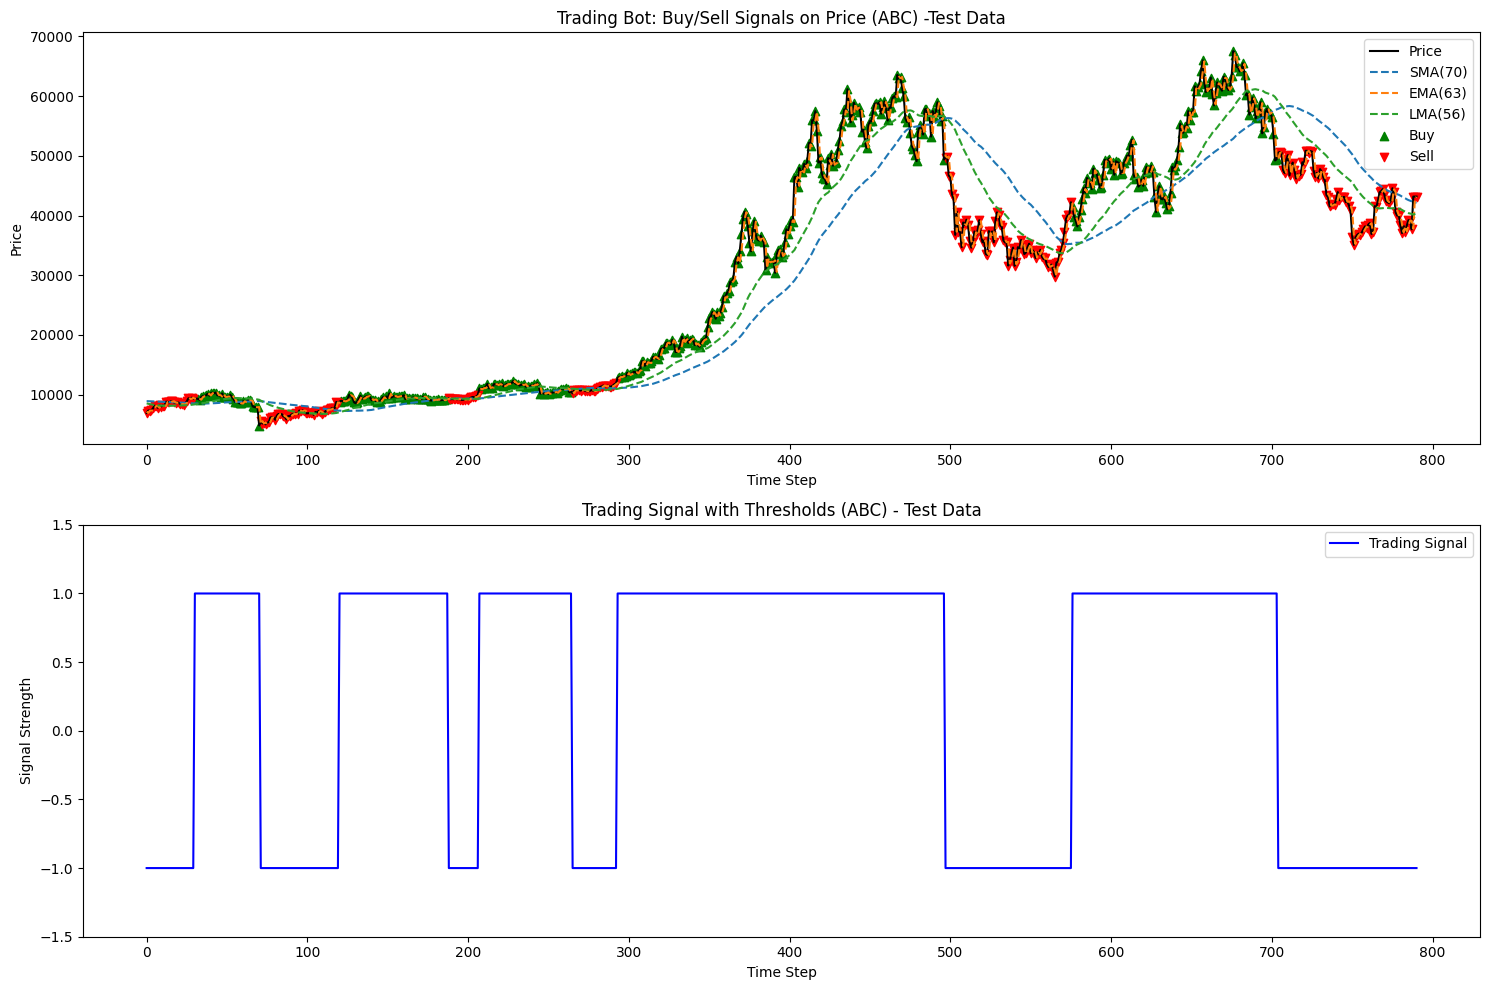

In [53]:

filepath = './testDaily.csv'

import matplotlib.pyplot as plt
import numpy as np

from data_processors import TradingDataProcessor
from data_processors import DataLoader
from trading_bot import TradingBotInstance  # Adjust import path as needed


def collect_momentum(loader):
    momentum = []
    while True:
        step_data = loader.step()
        if step_data is None:
            break
        # Extract only momentum values
        sma_mom, ema_mom, lma_mom = step_data[-3:]
        momentum.append((sma_mom, ema_mom, lma_mom))
    return np.array(momentum)



# === Prepare Data ===
processor = TradingDataProcessor(filepath)
prices = processor.closing_prices
sma = processor.get_sma(window_sma)
ema = processor.get_ema(window_ema, alpha=ema_alpha)
lma = processor.get_lma(window_lma)

# === Prepare DataLoader and get Momentum ===
loader_for_momentum = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
momentum = collect_momentum(loader_for_momentum)
sma_mom = momentum[:, 0]
ema_mom = momentum[:, 1]
lma_mom = momentum[:, 2]

# === Run Bot for Buy/Sell decisions and signal ===
loader_for_bot = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
bot = TradingBotInstance(
    dataset_path=filepath,
    window_sma=window_sma,
    window_ema=window_ema,
    window_lma=window_lma,
    ema_alpha=ema_alpha,
    threshold=threshold,
    w1=w1, w2=w2, w3=w3, w4=w4, w5=w5
)

# Re-implement signal tracking
signals = []
prices_trimmed = []
buy_signals = []
sell_signals = []
bot.current_signal = -1

while True:
    step_data = loader_for_bot.step()
    if step_data is None:
        break
    sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
    signal = bot._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
    signals.append(signal)
    price = loader_for_bot.get_price()
    prices_trimmed.append(price)

    if signal == 1:
        buy_signals.append(price)
        sell_signals.append(np.nan)
    elif signal == -1:
        sell_signals.append(price)
        buy_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

# === Plotting ===
plt.figure(figsize=(15, 10))

# --- Price & Moving Averages ---
plt.subplot(2, 1, 1)
plt.plot(prices_trimmed, label="Price", color='black')
plt.plot(sma, label=f"SMA({window_sma})", linestyle='--')
plt.plot(ema, label=f"EMA({window_ema})", linestyle='--')
plt.plot(lma, label=f"LMA({window_lma})", linestyle='--')
plt.scatter(range(len(buy_signals)), buy_signals, label='Buy', color='green', marker='^')
plt.scatter(range(len(sell_signals)), sell_signals, label='Sell', color='red', marker='v')
plt.title("Trading Bot: Buy/Sell Signals on Price (ABC) -Test Data")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()


# --- Signal with Thresholds ---
plt.subplot(2, 1, 2)
signal_array = np.array(signals)
plt.plot(signal_array, label="Trading Signal", color='blue')
plt.ylim(-1.5, 1.5)
plt.title("Trading Signal with Thresholds (ABC) - Test Data")
plt.xlabel("Time Step")
plt.ylabel("Signal Strength")
plt.legend()

plt.tight_layout()
plt.show()
